### This code example illustrates how to identify the cluster of water molecules in a given trajectory file

### Prerequisite:
* MSD_calculation.ipynb

### Package Required:
* numpy
* mdtraj
* matplotlib
* scipy
* Scikit-learn

#### Note: If you don't have the packages listed above installed, then you can type in the following commands in the terminal
* conda install numpy
* conda install -c conda-forge mdtraj
* conda install matplotlib
* conda install scipy
* pip install scikit-learn

### File Required:
* A trajectory file (.pdb)

* Note: Here, I use a trajectory that contains 67 water molecule as an example (~/pikachu/homes/zhuo/haverford/code_example/systemf_eq_step4.pdb), but this code can also be used for different systems with proper modifications.

### Background:
* KDTREE: an algorithm to look up nearest neighbor of points

Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html

* DBSCAN (Density-based spatial clustering of applications with noise)
  The DBSCAN algorithm is a density-based clustering method, which can be used to group the nearest neighbors into different clusters.

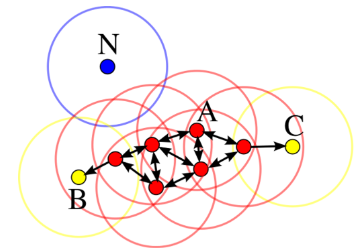

Ref: https://wiki.datrics.ai/dbscan-clustering



### The Actual Code:

1. Import the required package

In [389]:
import numpy as np
import mdtraj as md
from sklearn.cluster import DBSCAN
from scipy.spatial import cKDTree as KDTree
import nglview
import string

2. Load the .pdb file 

In [390]:
traj = md.load('systemf_eq_step4.pdb')
traj

<mdtraj.Trajectory with 1 frames, 8840 atoms, 445 residues, and unitcells at 0x7f11aa8eba70>

3. Extract some basic information from the trajectory

In [391]:
box_sizes = traj.unitcell_lengths[0]
box_sizes

array([3.9637, 3.9637, 3.9637], dtype=float32)

In [392]:
n_atoms = traj.n_atoms
n_atoms

8840

4. Select the oxygen atoms and their coordinates

In [393]:
topology = traj.topology
topology

<mdtraj.Topology with 3 chains, 445 residues, 8840 atoms, 5615 bonds at 0x7f11acb34aa0>

In [394]:
oxygen = topology.select('name == O')
xyz_oxygen = traj.xyz[:,oxygen,:][0]
print(oxygen)

[8505 8510 8515 8520 8525 8530 8535 8540 8545 8550 8555 8560 8565 8570
 8575 8580 8585 8590 8595 8600 8605 8610 8615 8620 8625 8630 8635 8640
 8645 8650 8655 8660 8665 8670 8675 8680 8685 8690 8695 8700 8705 8710
 8715 8720 8725 8730 8735 8740 8745 8750 8755 8760 8765 8770 8775 8780
 8785 8790 8795 8800 8805 8810 8815 8820 8825 8830 8835]


5. Cluster identification using KDTREE and DBSCAN

Wrap all the coordinates back to the box 

In [395]:
def wrap_pos_pbc(arr,box):
    arr = np.array(arr)
    arr[arr < 0] += box[0]
    arr[arr > box] -=box[0]
    return arr

In [396]:
xyz_oxygen_wrap = wrap_pos_pbc(xyz_oxygen,box_sizes)

Apply KDTREE to find clusters

In [397]:
cutoff = 0.35 # in nm
cluster_size = 3

In [398]:
tree = KDTree(data=xyz_oxygen_wrap, leafsize=12, boxsize=box_sizes)
pairs = tree.sparse_distance_matrix(tree,cutoff)

Assign cluster labels to each water molecules (-1 means not in any clusters)

In [399]:
dbscan = DBSCAN(eps=cutoff, min_samples=cluster_size, metric="precomputed", n_jobs=-1)
labels = dbscan.fit_predict(pairs)
labels

/homes/zhuo/anaconda3/envs/openmm/lib/python3.12/site-packages/sklearn/neighbors/_base.py:246: EfficiencyWarning: Precomputed sparse input was not sorted by row values. Use the function sklearn.neighbors.sort_graph_by_row_values to sort the input by row values, with warn_when_not_sorted=False to remove this warning.
  warnings.warn(


array([ 2,  1,  0,  0, -1,  1, -1, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  3,  2,  2, -1,  1,  3,  2, -1,  3, -1, -1, -1, -1,  2, -1,  5,
       -1, -1,  0, -1, -1, -1, -1, -1,  4, -1, -1,  4,  4,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  2,  5, -1, -1, -1, -1, -1, -1, -1])

Combine the oxygen index and cluster label together

In [400]:
cluster = set()
labels = np.asarray(labels)
for j, k in enumerate(labels):
    index_label = j,k+1 # -1 cannot map into the residue index, so change -1 into 0, and 0 into 1 etc
    cluster.add(index_label)
cluster = sorted(cluster)
cluster

[(0, 3),
 (1, 2),
 (2, 1),
 (3, 1),
 (4, 0),
 (5, 2),
 (6, 0),
 (7, 0),
 (8, 6),
 (9, 0),
 (10, 0),
 (11, 0),
 (12, 0),
 (13, 0),
 (14, 0),
 (15, 0),
 (16, 0),
 (17, 0),
 (18, 4),
 (19, 3),
 (20, 3),
 (21, 0),
 (22, 2),
 (23, 4),
 (24, 3),
 (25, 0),
 (26, 4),
 (27, 0),
 (28, 0),
 (29, 0),
 (30, 0),
 (31, 3),
 (32, 0),
 (33, 6),
 (34, 0),
 (35, 0),
 (36, 1),
 (37, 0),
 (38, 0),
 (39, 0),
 (40, 0),
 (41, 0),
 (42, 5),
 (43, 0),
 (44, 0),
 (45, 5),
 (46, 5),
 (47, 2),
 (48, 0),
 (49, 0),
 (50, 0),
 (51, 0),
 (52, 0),
 (53, 0),
 (54, 0),
 (55, 0),
 (56, 0),
 (57, 0),
 (58, 3),
 (59, 6),
 (60, 0),
 (61, 0),
 (62, 0),
 (63, 0),
 (64, 0),
 (65, 0),
 (66, 0)]

Save the result to a .txt file

In [401]:
np.savetxt('systemf_water_cluster_DBSCAN.txt',cluster,fmt='%d',header='index,label', delimiter=',')

6. Cluster identification using distance

Calculate the distance between two oxygen atoms

In [402]:
def vector_pbc(x0,x1,Box):
    """
    calculate vector with periodic boundary condition

    x0 -- initial position
    x1 -- finial position
    Box -- box size
    everything is in 1D, but can be used to calculate multiple dimensions as well
    """

    delta = x1 - x0
    delta= np.where(np.abs(delta) > 0.5 * Box, np.where(delta > 0, np.abs(delta)-Box,Box-np.abs(delta)), delta)
    return delta

def dist_pbc(x0,x1,Box):
    return np.sqrt(np.sum(vector_pbc(x0,x1,Box)**2.0, axis = -1))

In [403]:
dist= []
for i in np.arange(0,len(oxygen),1):
    for j in np.arange(0,len(oxygen),1):
        dist.append(dist_pbc(xyz_oxygen[i],xyz_oxygen[j],box_sizes))
dist

[0.0,
 2.0877473,
 2.7869563,
 2.8873641,
 2.8734136,
 2.2160146,
 1.8973544,
 1.9242854,
 3.120189,
 1.8814576,
 0.89669085,
 1.2649585,
 1.265869,
 1.3593081,
 2.501465,
 1.2571121,
 2.1458254,
 1.8350204,
 1.730573,
 0.6936121,
 0.262531,
 1.4166925,
 2.232689,
 2.0890462,
 0.7389813,
 2.59635,
 1.9410685,
 1.8798466,
 1.9761688,
 2.0017653,
 1.6858054,
 0.5183179,
 1.653018,
 2.9576497,
 1.8457383,
 2.302491,
 3.0294216,
 1.6839527,
 0.922324,
 1.4648719,
 2.0906074,
 1.8338225,
 2.4577377,
 2.7023773,
 1.7504016,
 2.2054534,
 2.4608715,
 1.9488716,
 1.0372884,
 2.2041852,
 2.5586038,
 2.1263745,
 2.172443,
 2.155939,
 1.9300487,
 1.4179587,
 1.4331837,
 1.9481351,
 0.67982906,
 3.0639708,
 1.0533518,
 2.7979994,
 2.0966566,
 0.9302808,
 2.092086,
 2.2084866,
 1.9134634,
 2.0877473,
 0.0,
 2.1026976,
 2.3233638,
 2.5849109,
 0.27107632,
 1.280341,
 2.6374998,
 2.04557,
 2.7789702,
 2.2059846,
 1.7887518,
 1.104564,
 2.6255856,
 2.3378475,
 1.3143635,
 2.015518,
 2.0767317,
 1.08210

Change the 1D distance array into 2D

In [404]:
dist = np.asarray(dist)
dist_2d=dist.reshape(len(oxygen),len(oxygen))
dist_2d

array([[0.       , 2.0877473, 2.7869563, ..., 2.092086 , 2.2084866,
        1.9134634],
       [2.0877473, 0.       , 2.1026976, ..., 2.6152864, 1.7898089,
        1.5486906],
       [2.7869563, 2.1026976, 0.       , ..., 1.8125798, 1.4542061,
        1.5741143],
       ...,
       [2.092086 , 2.6152864, 1.8125798, ..., 0.       , 1.8925834,
        2.136489 ],
       [2.2084866, 1.7898089, 1.4542061, ..., 1.8925834, 0.       ,
        1.8941336],
       [1.9134634, 1.5486906, 1.5741143, ..., 2.136489 , 1.8941336,
        0.       ]], dtype=float32)

Find out the pairs of water molecules with the distance less than a given cutoff

In [405]:
cut_off = 0.35 # in nm
selection= (dist_2d>0) & (dist_2d<cut_off)
indices = np.where(np.where(selection,dist_2d,0))
indices

(array([ 0,  1,  2,  3,  3,  5,  5,  5,  7,  8,  9, 15, 16, 18, 19, 19, 20,
        20, 22, 23, 24, 24, 26, 26, 27, 31, 31, 33, 34, 36, 39, 41, 42, 42,
        45, 46, 47, 51, 54, 58, 59, 59, 65, 66]),
 array([20,  5,  3,  2, 36,  1, 22, 47,  9, 59,  7, 39, 65, 26, 24, 31,  0,
        31,  5, 26, 19, 58, 18, 23, 34, 19, 20, 59, 27,  3, 15, 54, 45, 46,
        42, 42,  5, 66, 41, 24,  8, 33, 16, 51]))

In [406]:
indices = list(zip(np.array(indices[0]), np.array(indices[1])))
for row, col in indices:
    print(row, col)

0 20
1 5
2 3
3 2
3 36
5 1
5 22
5 47
7 9
8 59
9 7
15 39
16 65
18 26
19 24
19 31
20 0
20 31
22 5
23 26
24 19
24 58
26 18
26 23
27 34
31 19
31 20
33 59
34 27
36 3
39 15
41 54
42 45
42 46
45 42
46 42
47 5
51 66
54 41
58 24
59 8
59 33
65 16
66 51


Grouping the pairs 

In [407]:
combined_pairs = []
for m in range(len(oxygen)):
    for s in indices:
        merged = False
        for t in combined_pairs:
            if any(x in t for x in s):
                t.update(s)
                merged = True
                break
        if not merged:
            combined_pairs.append(set(s))
combined_pairs

[{0, 19, 20, 24, 31, 58},
 {1, 5, 22, 47},
 {2, 3, 36},
 {7, 9},
 {8, 33, 59},
 {15, 39},
 {16, 65},
 {18, 23, 26},
 {19, 24, 31, 58},
 {27, 34},
 {41, 54},
 {42, 45, 46},
 {51, 66}]

Remove duplicate subsets

In [408]:
combined_pairs_new = set()
res = []
for tup in list(combined_pairs):
    if not any(set(tup) <= s for s in combined_pairs_new):
        res.append(tup)
        combined_pairs_new.add(frozenset(tup))
combined_pairs_new

{frozenset({18, 23, 26}),
 frozenset({41, 54}),
 frozenset({42, 45, 46}),
 frozenset({51, 66}),
 frozenset({2, 3, 36}),
 frozenset({7, 9}),
 frozenset({8, 33, 59}),
 frozenset({1, 5, 22, 47}),
 frozenset({15, 39}),
 frozenset({27, 34}),
 frozenset({16, 65}),
 frozenset({0, 19, 20, 24, 31, 58})}

Select the groups with more than 2 water molecules in it

In [409]:
cluster_size = 3
cluster = sorted([sorted(list(s)) for s in combined_pairs_new if len(s) >= cluster_size])
cluster

[[0, 19, 20, 24, 31, 58],
 [1, 5, 22, 47],
 [2, 3, 36],
 [8, 33, 59],
 [18, 23, 26],
 [42, 45, 46]]

Include the index and label into an array

In [410]:
clusters = []
for i, subset in enumerate(cluster):
    for element in subset:
        clusters.append([element, i])
clusters = np.array(clusters)
clusters

array([[ 0,  0],
       [19,  0],
       [20,  0],
       [24,  0],
       [31,  0],
       [58,  0],
       [ 1,  1],
       [ 5,  1],
       [22,  1],
       [47,  1],
       [ 2,  2],
       [ 3,  2],
       [36,  2],
       [ 8,  3],
       [33,  3],
       [59,  3],
       [18,  4],
       [23,  4],
       [26,  4],
       [42,  5],
       [45,  5],
       [46,  5]])

Save the data

In [411]:
np.savetxt('systemf_water_cluster_distance.txt',clusters,fmt='%d',header='index,label', delimiter=',')

NOTE: In general, both the dbscan and the distance method will provide the same output, but the dbscan method is way faster than the distance one though

7. Writing the label into a .pdb file (optional)

Convert number to letter

In [412]:
num_to_letter = {i: letter for i, letter in enumerate(string.ascii_uppercase)}
converted_array = [(x, num_to_letter[y]) for x, y in clusters]
cluster_group_id = [tup[1] for tup in converted_array]
clusters[:,1],cluster_group_id

(array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5]),
 ['A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'B',
  'B',
  'B',
  'B',
  'C',
  'C',
  'C',
  'D',
  'D',
  'D',
  'E',
  'E',
  'E',
  'F',
  'F',
  'F'])

Write the new id into the residue name

In [413]:
traj = md.load('systemf_eq_step4.pdb')

In [414]:
new_traj = md.Trajectory(xyz=traj.xyz, topology=traj.topology)
for atom in new_traj.topology.atoms:
    if atom.residue.name == 'HOH':
        for i in np.arange(len(clusters[:,0])):
            if atom.index == oxygen[clusters[i][0]]:
                atom.residue.name = cluster_group_id[i]

In [415]:
new_traj.save("modified_systemf.pdb")